In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [4]:
print("Target names: {}".format(iris_dataset['target_names'])) #valores para el atributo objetivo

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names: \n{}".format(iris_dataset['feature_names'])) # atributos de la tabla

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Lo que normalmente se hace es dividir en dos los datos, uno para entrenar para el modelo y otra para probarlo
# los datos para probarlo se llaman test data, test set, or hold-out set.
#scikit ya trae una funcion que parte en 75% para training y 25% para test. La eleccion es aleatoria
# upper case para los datos, es decir arreglos de 2 dimensiones(matriz) y minuscula o lowercase para el target (vector)
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
#y_train la salida de los datos de entrenamiento
#y_test la salida de los datos para test
#Para asegurarnos de que obtendremos la misma salida si ejecutamos la misma función varias veces, proporcionamos el generador 
# de números pseudoaleatorios con una semilla fija mediante el parámetro random_state. 
# Esto hará que el resultado sea determinista, por lo que esta línea siempre tendrá el mismo resultado. 
#Siempre corregiremos el random_state de esta manera cuando usemos procedimientos aleatorios en este libro.

In [20]:
print("iris_dataset:\n",iris_dataset['data'].shape)
print("X_train corresponde al 75% de iris_dataset, y son para entrenar :\n",X_train.shape)
print("X_test corresponde al 25% de iris_dataset y son para probar :\n",X_test.shape)
print("y_train es el target u objetivo del 75% o X_train:\n",y_train)
print("y_test es el target u objetivo del 25% o X_test\n",y_test)

iris_dataset:
 (150, 4)
X_train corresponde al 75% de iris_dataset, y son para entrenar :
 (112, 4)
X_test corresponde al 25% de iris_dataset y son para probar :
 (38, 4)
y_train es el target u objetivo del 75% o X_train:
 [1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]
y_test es el target u objetivo del 25% o X_test
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


# First Things First: Look at Your Data

In [30]:
import pandas as pd
import mglearn
import numpy as np
iris_df_train = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
print(iris_df_train[:5])
iris_df_train.to_csv(r'D:\01_ESTUDIOS\MAESTRIA\7_MACHINE_LEARNING\iris.txt', header=True, index=None, sep=',', mode='a')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.9               3.0                4.2               1.5
1                5.8               2.6                4.0               1.2
2                6.8               3.0                5.5               2.1
3                4.7               3.2                1.3               0.2
4                6.9               3.1                5.1               2.3


C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


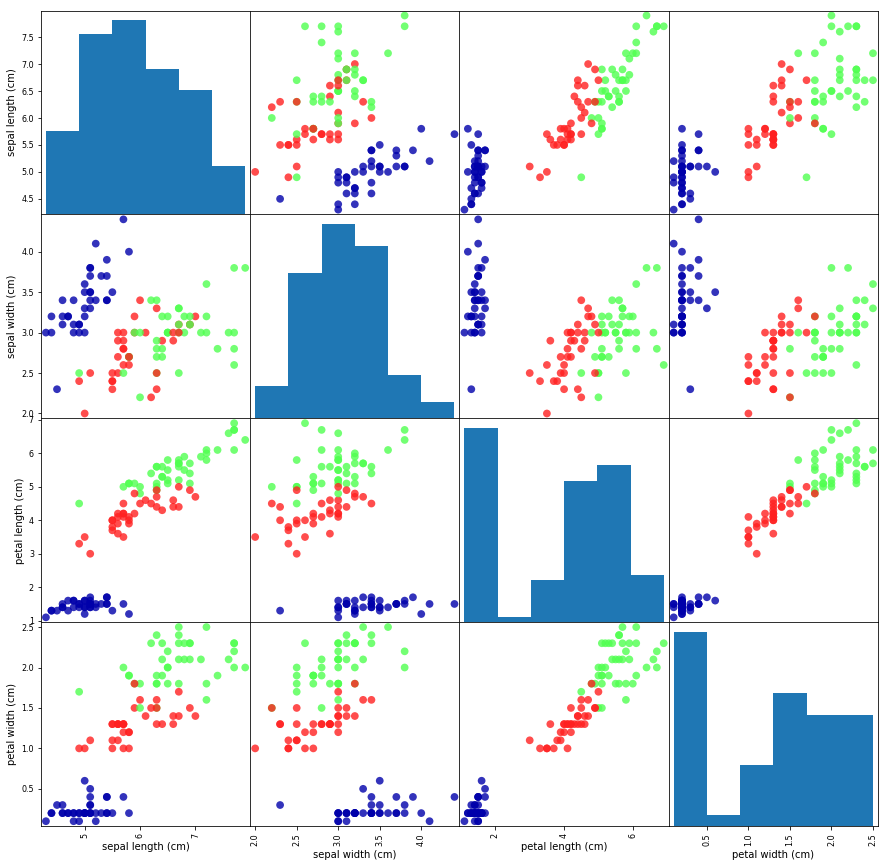

In [31]:
grr = pd.scatter_matrix(iris_df_train, c=y_train, figsize=(15, 15), marker='o',s=60, alpha=0.8,
                        hist_kwds={'bins': 6},cmap=mglearn.cm3) 

#alpha amount of transparency applied
#s tamaño de la marca del scatter plot

# Building Your First Model: k-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
#Se contruira el modelo guardando los datos de entretamiento. Para hacer la prediccion para un nuevo punto, el 
#algoritmo encontrara el punto en dataset de traning que este mas cercano al nuevo punto. Esto se debe a que 
#elegimos k = 1, indicando que buscara el vecino mas cercano, y se clasificara como ese. Si k aumenta, se clasificara
# de acuerdo a donde esten los k vecinos mas cercanos.
#The knn object encapsulates the algorithm that will be used to build the model

In [34]:
#knn es una instacion de la clase KNeighborsClassifier y fit uno de sus metodos.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Making Predictions

In [36]:
X_new = np.array([[5, 2.9, 1, 0.2]]) #representa las medidas de una nueva flor a clasificar
print("X_new.shape: {}".format(X_new))

X_new.shape: [[5.  2.9 1.  0.2]]


In [37]:
prediction = knn.predict(X_new) #evaluamos la nueva flor con el modelo entrenado con X_train
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


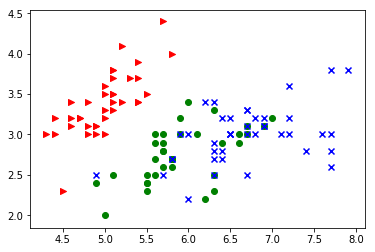

In [50]:
import matplotlib.pyplot as plt
for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'
    plt.scatter(X_train[y_train == t,0],X_train[y_train == t,1],marker=marker,c=c)
        

(112, 4) (113, 4)
True


<IPython.core.display.Javascript object>


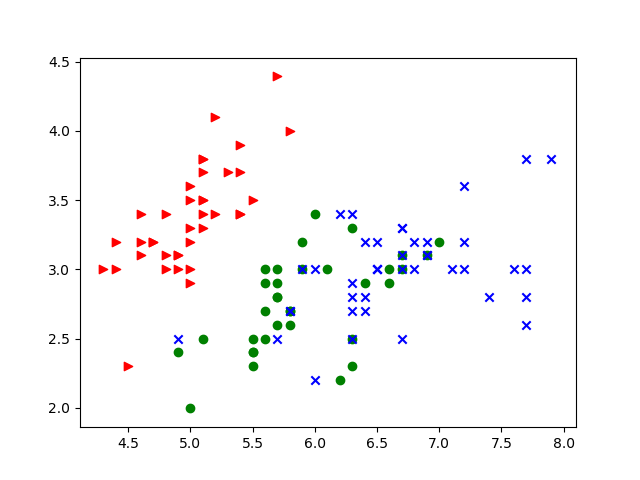

In [139]:
%matplotlib notebook
X_train_new = np.append(X_train,[[5, 2.9, 1, 0.2]],axis=0)
y_train_new = np.append(y_train,[0], axis=0) #axis = 0 para que inserte el arreay en la matrix
print(X_train.shape,X_train_new.shape)

print(X_train_new[112][0]==5)

import matplotlib.pyplot as plt
for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'
    plt.scatter(X_train_new[y_train_new == t,0],X_train_new[y_train_new == t,1],marker=marker,c=c)

In [136]:
np.take(X_train_new, 114)

4.6

In [129]:
print(a)
np.take(a, 0)

[1 2 3 4 5]


1

In [83]:
np.append(a,[3,4])

array([1, 2, 3, 4])

In [112]:
tmp = [1,2,3,4,5] #python list
a = np.array(tmp) #numpy array
i = list(a).index(5) # i will return index of 2, which is 1

z =[[1,2],[3,4]]
j = list(z).index([1,2])
print(j)

0
